In [106]:
import pandas as pd
import yfinance as yf
import pandas as pd
from datetime import datetime
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

In [119]:
from_date='2016-12'
to_date='2022-12'
timeframe="M"

data_file='SET_CLose_Day.csv'

months_param=[1,2,3,4]
#months_param=[]

In [120]:
df=pd.read_csv(data_file,parse_dates=['Date/Time'],dayfirst=True,usecols=['Date/Time','close'])
df.rename(columns={'Date/Time':'date'},inplace=True)
df.set_index('date',inplace=True)
df=df.loc[from_date:to_date,:]
df = df.resample(timeframe).last()
df['roc']=df['close'].pct_change()*100
df['roc']=df['roc'].round(2)
df=df.dropna()


df['year'] = df.index.year
df['month'] = df.index.month
df['month_name'] = df.index.month_name()


if  len(months_param)>0:
 df=df.query('month in @months_param')

df=df.reset_index(drop=False)
df['year-month']=df.apply(lambda x :  f"{x.year}-{x.month}"  ,axis=1)
df.tail(10)

,date,close,roc,year,month,month_name,year-month
14,2020-03-31,1125.86,-16.01,2020,3,March,2020-3
15,2020-04-30,1301.66,15.61,2020,4,April,2020-4
16,2021-01-31,1466.98,1.22,2021,1,January,2021-1
17,2021-02-28,1496.78,2.03,2021,2,February,2021-2
18,2021-03-31,1587.21,6.04,2021,3,March,2021-3
19,2021-04-30,1583.13,-0.26,2021,4,April,2021-4
20,2022-01-31,1648.81,-0.53,2022,1,January,2022-1
21,2022-02-28,1685.18,2.21,2022,2,February,2022-2
22,2022-03-31,1695.24,0.60,2022,3,March,2022-3
23,2022-04-30,1667.44,-1.64,2022,4,April,2022-4


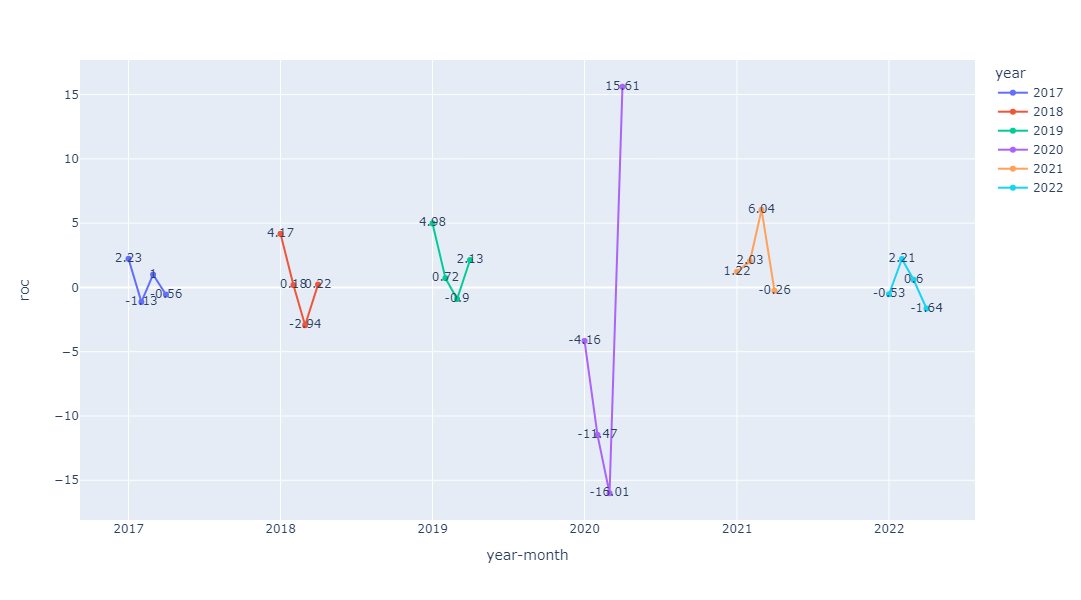

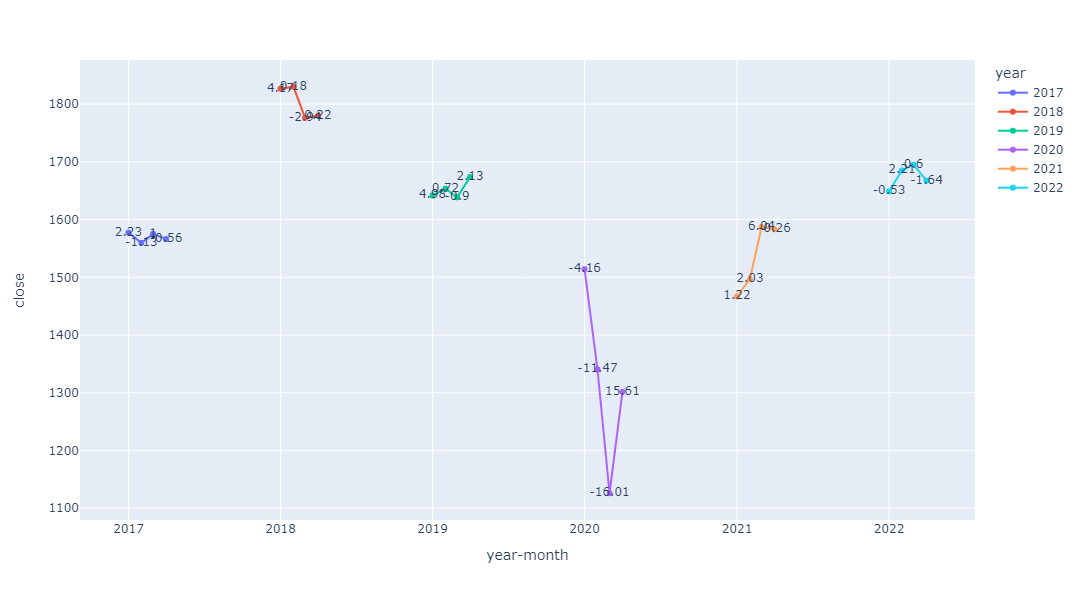

In [121]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.line(df, x='year-month', y='roc', color='year',text='roc', width=1200, height=600)
fig.show()

fig = px.line(df, x='year-month', y='close', color='year',text='roc', width=1200, height=600)
fig.show()


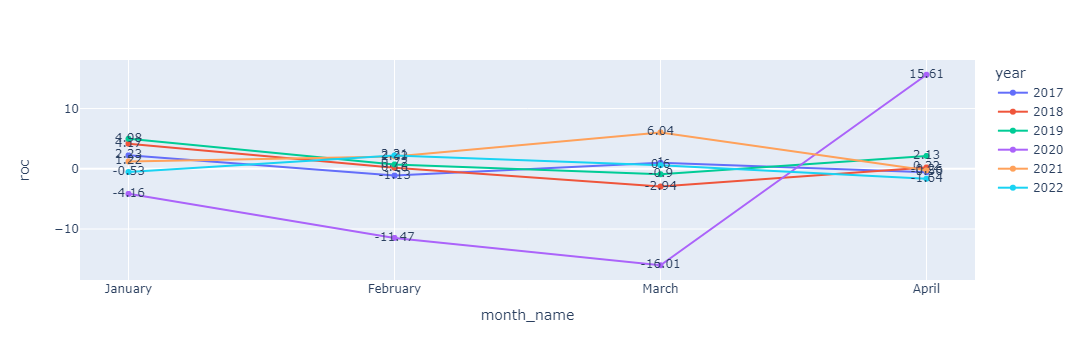

In [122]:
fig = px.line(df, x='month_name', y='roc', color='year',text='roc', )
fig.show()